# 🎭 Matplotlib integration

In [ ]:
import os

In [ ]:
os.environ['DEBUG'] = '0'

In [ ]:
# |hide
import numpy as np
from tinygrad.tensor import Tensor
from matplotlib import pyplot as plt, rcParams

from lovely_grad import monkey_patch

In [ ]:
# |hide

# Deterministic svg output
rcParams["svg.hashsalt"] = "1"

# No date, don't include matplotlib version
kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }} 
%config InlineBackend.print_figure_kwargs = kwargs

In [ ]:
# |hide
monkey_patch()

In [ ]:
# |hide
numbers = Tensor(np.load("mysteryman.npy"))
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std

mean = Tensor(in_stats[0])[:,None,None]
std = Tensor(in_stats[1])[:,None,None]
numbers = (numbers*std + mean).clip(0,1)

### <code>.fig</code>

`.rgb`, `.chans` and `.plt` all have a `.fig` attribute that returns a matplotlib figure object. 

<class 'matplotlib.figure.Figure'>


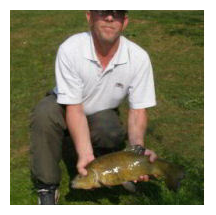

In [ ]:
a = numbers.rgb.fig # matplotlib figure
print(type(a))
a

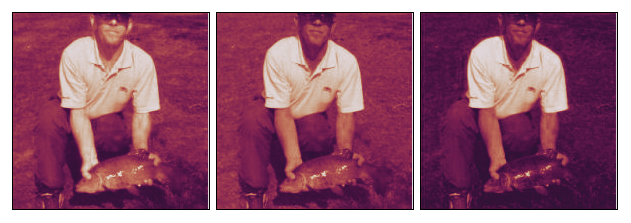

In [ ]:
numbers.chans.fig

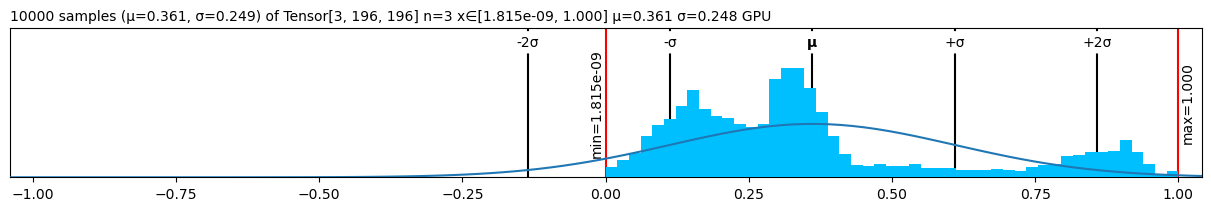

In [ ]:
numbers.plt.fig

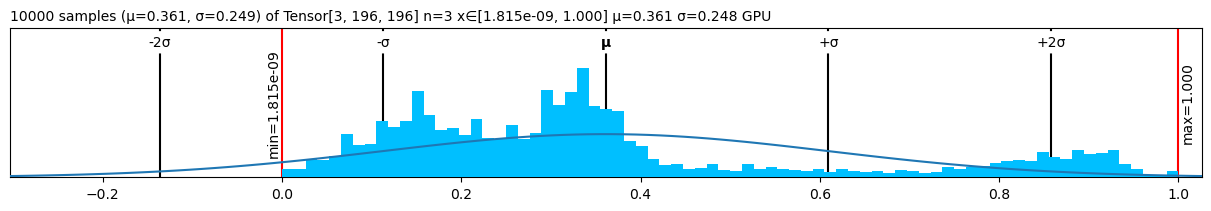

In [ ]:
numbers.plt(center="mean").fig

### Saving the figure

You can save the figure by calling its `savefig` method:

In [ ]:
numbers.rgb.fig.savefig("tench.jpg")

In [ ]:
!file tench.jpg; rm tench.jpg

tench.jpg: JPEG image data, JFIF standard 1.01, resolution (DPI), density 100x100, segment length 16, baseline, precision 8, 196x196, components 3


### Using existing `Axes`

All functions allow an `ax=` argument that accepts an existing `Axes` object into which they will plot:

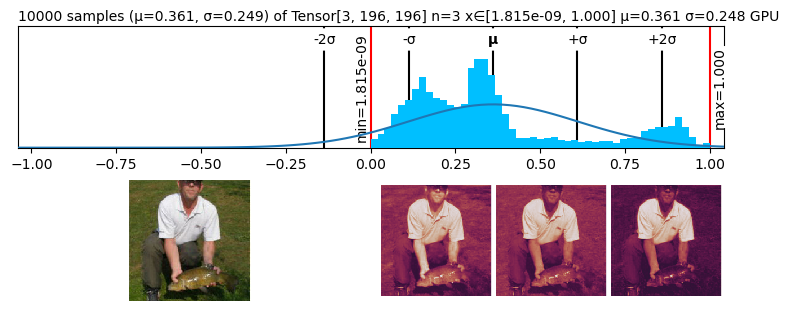

In [ ]:
fig = plt.figure(figsize=(8,3))
fig.set_constrained_layout(True)
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1,1:])

ax2.set_axis_off()
ax3.set_axis_off()

numbers.plt(ax=ax1)
numbers.rgb(ax=ax2)
numbers.chans(ax=ax3);

### Without Jupyter

By default, the Lovely functions will call `plt.close(fig)` on the figures they create.

This prevents displaying the figures twice when running in Jupyter.\
If you are not using Jupyter, here are 2 [configuration options](utils.config.html) you might want to set:

`fig_close=False`

```py
#!/usr/bin/env python
from lovely_grad import config, set_config

...

set_config(fig_close=False)
numbers.chans()

# or, using the context manager:
with config(fig_close=False):
    numbers.chans()

plt.show() # Will show all open figures
```

`fig_show=True`

If set, lovely will call `plt.show()` after each figure creation.\
You don't need to set `fig_close=False` manually.

```py
set_config(fig_show=True)

numbers.chans() # Figure generated and shown

# Note, you have to use the "call" syntax `( )`, as figure
# generation is not triggerd by just accessing the attribute

numbers.chans  # No figure generated

f = numbers.plt.fig # figure generated, shown, and returned.
```

Note, `plt.show()` closes all figures.